In [12]:
import pandas as pd
import openai
import dotenv
from dotenv import load_dotenv
load_dotenv()


dataset = pd.read_csv('supermarket_sales.csv')
dataset.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
dataset['Rating'].mean()

6.9727

## Criand Assistant ## 

In [14]:
file = openai.files.create(
    file=open('supermarket_sales.csv','rb'),
    purpose='assistants'
)

In [15]:
assistant = openai.beta.assistants.create(
    name='Analista de dados , Machine Learning e LLM ',
    instructions='Fornecer e analiser dados e gerar codigos em python e analisar estatisticas voce vai usar os arquivos .csv \
    informados para fazer as devidas analises extraia o maximo de inforamções possiveis',
    tools=[{'type':'code_interpreter'}],
    tool_resources={'code_interpreter' : {'file_ids': [file.id]}},
    model='gpt-4o'
)

In [5]:
thread = openai.beta.threads.create()

In [6]:
texto_mensagem = 'Faça analise de dados da planilha e traga insights e dados relevantes para tomada de descisão '
message = openai.beta.threads.messages.create(
    thread_id=thread.id,
    role = 'user',
    content = texto_mensagem
)

In [7]:
## Rodando a mensagem gerada com thread ##

run = openai.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions='O nome e felippe ele e um usuario premium'
)

In [8]:
import time

while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = openai.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

In [10]:
run.status

'failed'

In [18]:
if run.status == 'completed':
    messagens = openai.beta.threads.messages.list(
        thread_id=thread.id
    )
    print(messagens)

else:
    print('errro',run.status)

SyncCursorPage[Message](data=[Message(id='msg_Bbk5ZncslmAJ7vUGa2Y8hPNa', assistant_id='asst_JNZP7rPUAzr0nF4ETreCQguG', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='O rating médio das vendas no conjunto de dados é aproximadamente **6,97**.'), type='text')], created_at=1737476732, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_vD0PqQ5jqmhVjQF5vyJDlE57', status=None, thread_id='thread_ZNovzezrvRd3TLDqje8ElwSe'), Message(id='msg_uulu4TaAOssTP1QjV6L6nnTa', assistant_id='asst_JNZP7rPUAzr0nF4ETreCQguG', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='O arquivo contém informações sobre vendas, incluindo uma coluna chamada "Rating", que parece representar a classificação de cada venda. Podemos calcular a média dos ratings nesta coluna. Vamos proceder com o cálculo.'), type='text')], created_at=1737476729, incomplete_at=None, incomplete_

In [20]:
print(messagens.data[0].content[0].text.value)

O rating médio das vendas no conjunto de dados é aproximadamente **6,97**.


## Analisando Passo a Passo ##

In [23]:
run_steps = openai.beta.threads.runs.steps.list(
  thread_id=thread.id,
  run_id=run.id
)

In [24]:
for step in run_steps.data[::-1]:
    print('\n=== Step:', step.step_details.type)
    if step.step_details.type == 'tool_calls':
        for tool_call in step.step_details.tool_calls:
            print('-----')
            print(tool_call.code_interpreter.input)
            print('-----')
            print('Result')


=== Step: message_creation

=== Step: tool_calls
-----
# Vamos ler o conteúdo do arquivo para inspecionar o formato e a estrutura
import pandas as pd

file_path = '/mnt/data/file-LqBrKPNCZxqWysFK1SxmXN'
data = pd.read_csv(file_path)

# Mostrar as primeiras linhas do DataFrame para entender a estrutura
data.head()
-----
Result

=== Step: message_creation

=== Step: tool_calls
-----
# Calcular o rating médio das vendas
average_rating = data['Rating'].mean()
average_rating
-----
Result

=== Step: message_creation


## Potando Grafico ##


In [27]:
assitant = openai.beta.assistants.create(
    name="Analista Fianceiro",
    instructions='Você é um analista financeiro de um supermercado. Você deve utilizar os dados \
        .csv informados relativos as vendas do supermercado para realizar as suas análises.',
    tools=[{'type': 'code_interpreter'}],
    tool_resources={'code_interpreter': {'file_ids': [file.id]}},
    model='gpt-4o'
)

thread = openai.beta.threads.create()

texto_mensagem = 'Qual é o raqting médio das vendas do supermercado? O arquivo estáno formato csv.'
texto_mensagem = 'Gere um gráfico de pizza com o percentual de vendas por meio de pagamento. O arquivo está no formato csv.'

message = openai.beta.threads.messages.create(
    thread_id=thread.id,
    role='user',
    content=texto_mensagem
)

run = openai.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assitant.id,
    instructions='O nome do usuário é Adriano Soares e ele é um usuário Premium.'
)





In [29]:
import time

while run.status in ['queued', 'in_progress', 'cancelling']:
    time.sleep(1)
    run = openai.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=run.id
    )

In [30]:
run.status

'completed'

In [31]:
if run.status == 'completed':
    mensagens = openai.beta.threads.messages.list(
        thread_id=thread.id
    )
    print(mensagens)
else:
    print('Errro', run.status)

SyncCursorPage[Message](data=[Message(id='msg_B37q8I4ST98Aitr9pug99cLj', assistant_id='asst_yMdQGYdCUFYzgNuwrwywELpf', attachments=[], completed_at=None, content=[ImageFileContentBlock(image_file=ImageFile(file_id='file-BWknXK2U5o8n6U9QtYYzWT', detail=None), type='image_file'), TextContentBlock(text=Text(annotations=[], value='Aqui está o gráfico de pizza que mostra o percentual de vendas por meio de pagamento. Cada segmento representa um meio de pagamento, e o percentual correspondente está indicado no gráfico. Se precisar de mais alguma coisa, é só avisar!'), type='text')], created_at=1737479740, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_QK8jgtYmVfhGZbwJitvBRt9p', status=None, thread_id='thread_N6hAVhaIQbo7bXR1UUZcQHmP'), Message(id='msg_vR7scsNtS0DKKEWhJNRd7eam', assistant_id='asst_yMdQGYdCUFYzgNuwrwywELpf', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='O arquivo CS

In [32]:
print(mensagens.data[0].content[0])

ImageFileContentBlock(image_file=ImageFile(file_id='file-BWknXK2U5o8n6U9QtYYzWT', detail=None), type='image_file')


In [33]:
run_steps = openai.beta.threads.runs.steps.list(
  thread_id=thread.id,
  run_id=run.id
)


=== Step: message_creation
Primeiro, vou dar uma olhada no conteúdo do arquivo CSV para entender a estrutura dos dados e identificar as colunas relevantes para criar o gráfico de pizza com o percentual de vendas por meio de pagamento. Vamos começar lendo o arquivo.

=== Step: tool_calls
-----
import pandas as pd

# Carregar o arquivo CSV
file_path = '/mnt/data/file-LqBrKPNCZxqWysFK1SxmXN'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataframe para entender sua estrutura
data.head()
-----
Result

=== Step: message_creation
O arquivo CSV contém uma coluna chamada "Payment", que indica o meio de pagamento utilizado. Usaremos essa coluna para calcular o percentual de vendas por meio de pagamento e criar um gráfico de pizza. Vamos prosseguir com isso.

=== Step: tool_calls
-----
import matplotlib.pyplot as plt

# Calcular o total de vendas por meio de pagamento
payment_counts = data['Payment'].value_counts()
payment_percentages = payment_counts / payment_counts.sum() * 10

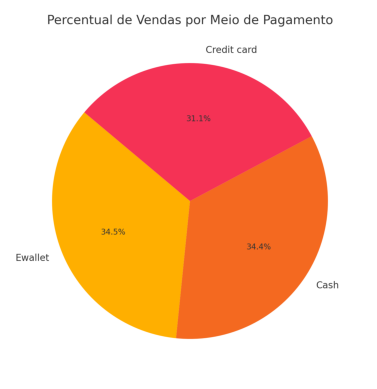

In [37]:
for step in run_steps.data[::-1]:
    print('\n=== Step:', step.step_details.type)
    
    if step.step_details.type == 'tool_calls':
        for tool_call in step.step_details.tool_calls:
            print('-----')
            print(tool_call.code_interpreter.input)
            print('-----')
            print('Result')
    
    if step.step_details.type == 'message_creation':
        message = openai.beta.threads.messages.retrieve(
            thread_id=thread.id,
            message_id=step.step_details.message_creation.message_id
        )
        
        if message.content[0].type == 'text':
            print(message.content[0].text.value)
        
        if message.content[0].type == 'image_file':
            file_id = message.content[0].image_file.file_id
            image_data = openai.files.content(file_id)
            
            # Save the image to a file
            with open(f'{file_id}.png', 'wb') as f:
                f.write(image_data.read())
                print(f'Imagem {file_id} salva')
            
            # Use matplotlib to display the image
            import matplotlib.pyplot as plt
            import matplotlib.image as mpimg
            
            # Read the image from the saved file
            img = mpimg.imread(f'{file_id}.png')
            
            # Create a figure to display the image
            fig, ax = plt.subplots()
            ax.set_axis_off()  # Hide axis
            ax.imshow(img)  # Show image
            plt.show()
